In [1]:
import pandas as pd
dateRangePeriod = pd.date_range(start='1/1/2018', end='1/08/2018')
print(dateRangePeriod)

dateRangeFreq = pd.date_range(start='1/1/2018', periods=8)
print(dateRangeFreq)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')


In [2]:
# create a categocal matrix using numpy
import numpy as np
data = np.random.rand(3, 2)
print(data)

# get the index of the maximum value in the matrix
print(np.unravel_index(data.argmax(), data.shape))

# print the maximum value in the matrix using the index
print(data[np.unravel_index(data.argmax(), data.shape)])



[[0.90521722 0.41989664]
 [0.30957222 0.16565978]
 [0.55391178 0.08357463]]
(0, 0)
0.9052172219611784


In [3]:
# combine two dataframes
df1 = pd.DataFrame(data=np.random.randint(1, 10, (3, 2)), columns=['A', 'B'])
df2 = pd.DataFrame(data=np.random.randint(1, 10, (3, 2)), columns=['A', 'B'])
print(df1)
print(df2)

# combine the two dataframes
result = pd.concat([df1, df2])
print(result)


   A  B
0  4  9
1  7  7
2  5  3
   A  B
0  6  3
1  7  9
2  7  1
   A  B
0  4  9
1  7  7
2  5  3
0  6  3
1  7  9
2  7  1


In [4]:
# join the two dataframes using the join method
result = df1.join(df2, lsuffix='_df1', rsuffix='_df2')
print(result)



   A_df1  B_df1  A_df2  B_df2
0      4      9      6      3
1      7      7      7      9
2      5      3      7      1


In [5]:
# using left join to join the two dataframes creating a new dataframe
result = pd.merge(df1, df2, on='A', how='left')
print(result)



   A  B_x  B_y
0  4    9  NaN
1  7    7  9.0
2  7    7  1.0
3  5    3  NaN


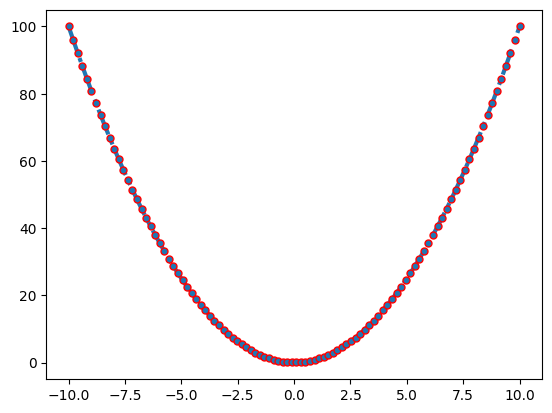

In [6]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# plot a parabola
x = np.linspace(-10, 10, 100)
y = x**2
plt.plot(x, y, marker='o', markeredgecolor='r', markersize=5, lw=3, ls='-.')
plt.show()


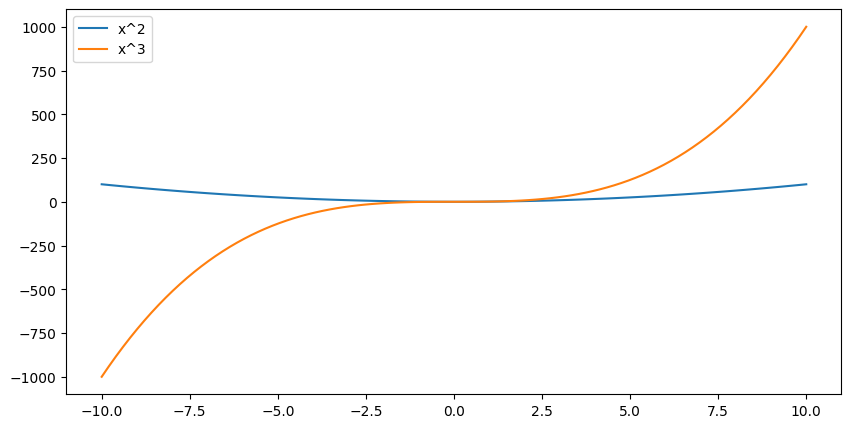

In [7]:
# plot a line graph comparing two features
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 5))
y1 = x**2
y2 = x**3
plt.plot(x, y1, label='x^2')
plt.plot(x, y2, label='x^3')
plt.legend()
plt.show()


In [9]:
# create an example of the ways to detect missing data in a data frame
data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)

# check for missing data in the dataframe
print(df.isnull())

# check for missing data in the dataframe
print(df.notnull())

# check for missing data in the dataframe
print(df.isnull().sum())

# check for missing data in the dataframe
print(df.notnull().sum())

# check for missing data in the dataframe
print(df.dropna())

# check for missing data in the dataframe
print(df.dropna(axis=1))

       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
       A      B     C
0   True   True  True
1   True  False  True
2  False  False  True
A    1
B    2
C    0
dtype: int64
A    2
B    1
C    3
dtype: int64
     A    B  C
0  1.0  5.0  1
   C
0  1
1  2
2  3


## Types of missing Data:

In [ ]:
# missing completely at random example
data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)
print(df)

# missing completely at random example
print(df.dropna())

# missing at random
data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)
print(df)

# missing at random
print(df.dropna())

# missing not at random
data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)
print(df)

In [ ]:
## Handling missing value - Simple methods

# 1. Global constant replacement
print(df.fillna(0))

# 2. Column-wise constant replacement
print(df.fillna({'A': 0, 'B': 1, 'C': 2}))

# 3.listwise deletion - drop rows with missing values
print(df.dropna())

# 4. Pairwise deletion - drop columns with missing values
print(df.dropna(axis=1))

# 5. Forward fill
print(df.fillna(method='ffill'))

# 6. Backward fill
print(df.fillna(method='bfill'))

# 7. Interpolation
print(df.interpolate())

# 8. Replace missing values with the mean of the column
print(df.fillna(df.mean()))

# 9. Replace missing values with the median of the column
print(df.fillna(df.median()))

# 10. univariant imputation - replace missing values with the most frequent value
print(df.fillna(df.mode().iloc[0]))

# 11. Multivariant imputation - use the KNN algorithm to replace missing values
# KNN algorithm is used to replace missing values in a dataset by finding the K-nearest neighbors
# and replacing the missing values with the mean of the K-nearest neighbors
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)
print(df)
print(imputer.fit_transform(df))

# 12. regression imputation - use the regression algorithm to replace missing values
# regression imputation is used to replace missing values in a dataset by finding the regression line
# and replacing the missing values with the predicted values from the regression line
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)
print(df)

# 13. logistic regression imputation - use the logistic regression algorithm to replace missing values
# logistic regression imputation is used to replace missing values in a dataset by finding the logistic regression line
# and replacing the missing values with the predicted values from the logistic regression line
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)

# 14. decision tree imputation - use the decision tree algorithm to replace missing values
# decision tree imputation is used to replace missing values in a dataset by finding the decision tree
# and replacing the missing values with the predicted values from the decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)

# 15. random forest imputation - use the random forest algorithm to replace missing values
# random forest imputation is used to replace missing values in a dataset by finding the random forest
# and replacing the missing values with the predicted values from the random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

data = {'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan], 'C': [1, 2, 3]}
df = pd.DataFrame(data)




In [ ]:
# handling noisy data
#why do we need to handle noisy data
# noisy data can affect the accuracy of the model
# noisy data can affect the performance of the model
# noisy data can affect the reliability of the model
# noisy data can affect the interpretability of the model
# noisy data can affect the scalability of the model
# noisy data can affect the efficiency of the model
# noisy data can affect the scalability of the model

# how to handle noisy data
# 1. remove noisy data example
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'B': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
df = pd.DataFrame(data)
print(df)

# remove noisy data example
print(df[df['A'] < 5])

# 2. replace noisy data example
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'B': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
df = pd.DataFrame(data)
print(df)

# replace noisy data example
print(df.replace(5, 0))

# 3. smoothing noisy data example
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'B': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
df = pd.DataFrame(data)
print(df)
